## LAB 4 - OUTLIER DETECTION USING KMEANS (30.12.2024)

## AIM:
To apply Kmeans clustering to detect outliers in the given dataset.

## ALGORITHM

1) **Load the Dataset**
Load the dataset (e.g., using fetch_california_housing() or any other dataset). The dataset typically includes multiple features (e.g., population, house age, median income) and a target variable (e.g., housing prices or outcomes). Ensure that the data is in a suitable format for analysis.

2) **Create a DataFrame**

Convert the loaded dataset into a pandas DataFrame, where each feature is represented as a column, and the target variable (e.g., Outcome) is added as an additional column. This DataFrame provides a structured view of the data.

3) **Explore the Data**

Perform an initial exploration of the dataset by:
- Checking summary statistics using df.describe() to understand the mean, standard deviation, and distribution of each feature.
- Checking for missing values using df.isnull().sum() to ensure the data is complete and free from missing values.

4) **Prepare the Data**

- Separate the Features and Target: Extract the input features (e.g., sepal length, sepal width, etc.) into a new variable (e.g., X), and the target variable (e.g., Outcome) into a separate variable (e.g., y).
- Standardize the Features: Apply StandardScaler to standardize the features. Standardization is crucial in distance-based algorithms like KNN because it ensures that features with larger scales do not dominate the distance calculation.

5) **Implement KNN for Outlier Detection**

- Apply the K-Nearest Neighbors (KNN) algorithm to compute the distances between each data point and its nearest neighbors. These distances indicate how far each data point is from the other points in the feature space.
- Choose a parameter (typically K = 5 or another suitable number) to calculate the K-th nearest neighbor distance for each point in the dataset.
         
6) **Identify Outliers**
   
Use the KNN distances to identify outliers. Outliers are typically defined as data points that have a distance to their nearest neighbors that is significantly greater than the majority of the points in the dataset.
Set a threshold based on the distribution of the KNN distances (e.g., using the 95th percentile). Points whose distances exceed this threshold are considered outliers.

8) **Evaluate and Label Outliers**
   
- Create a new column in the DataFrame (e.g., Outlier) where each data point is labeled as True for outliers and False for non-outliers. This labeling is done by comparing the KNN distances to the chosen threshold.
- Optionally, use a LabelEncoder to encode the outlier labels as numeric values (0 for False, 1 for True).

8) **Visualize the Data and Outliers**
   
- Correlation Heatmap: Create a correlation heatmap to visualize the relationships between features. This may provide insights into feature interactions that help with understanding the data structure.
- Boxplots: Plot boxplots for each feature to visually highlight potential outliers. Boxplots show the distribution and help identify points that are far away from the typical range (outliers).
- Scatter Plots: Create scatter plots to show how the data points are distributed, with outliers marked in a different color or style. Typically, outliers are plotted in red or with a different marker to distinguish them from normal points.

## DESCRIPTION

KMeans (K-Means Clustering) is a popular unsupervised machine learning algorithm used for clustering. The goal of KMeans is to partition a dataset into a set of K clusters based on feature similarity. Each data point is assigned to one of the K clusters, and the algorithm iterates to improve the assignment by minimizing the variance within each cluster.

Outlier detection using KMeans involves identifying data points that are far away from the cluster centers, which are considered as outliers because they don’t fit well into any cluster.

## CODE AND OUTPUT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['Outcome'] = housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Outcome
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Outcome
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Outcome       0
dtype: int64

In [5]:
X = df.drop('Outcome',axis=True)

In [6]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster']=kmeans.fit_predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
distances = kmeans.transform(X_scaled)
min_distances = np.min(distances, axis=1)

In [9]:
threshold = np.percentile(min_distances, 95)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlier'] = min_distances > threshold
df['Outlier'] = le.fit_transform(df['Outlier'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Outcome,Cluster,Outlier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1,0


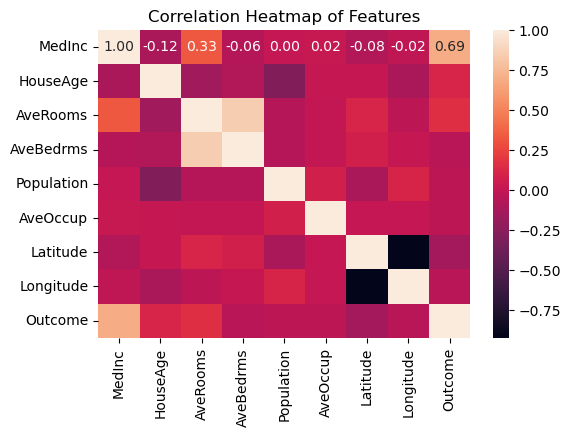

In [11]:
plt.figure(figsize=(6, 4))
corr_matrix = df.drop(columns=['Outlier', 'Cluster']).corr()  
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

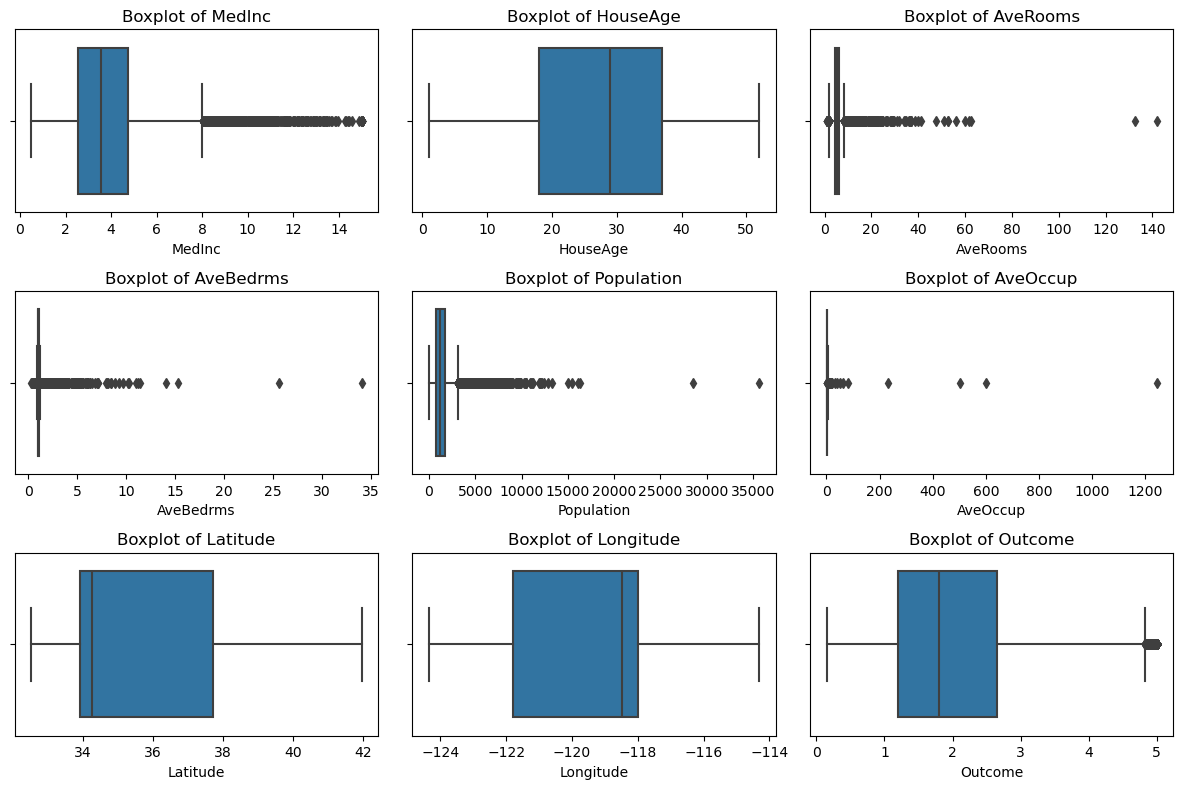

In [12]:
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(df.columns[:-2]): 
    plt.subplot(3, 3, idx + 1)
    
    sns.boxplot(x=df[feature])  
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

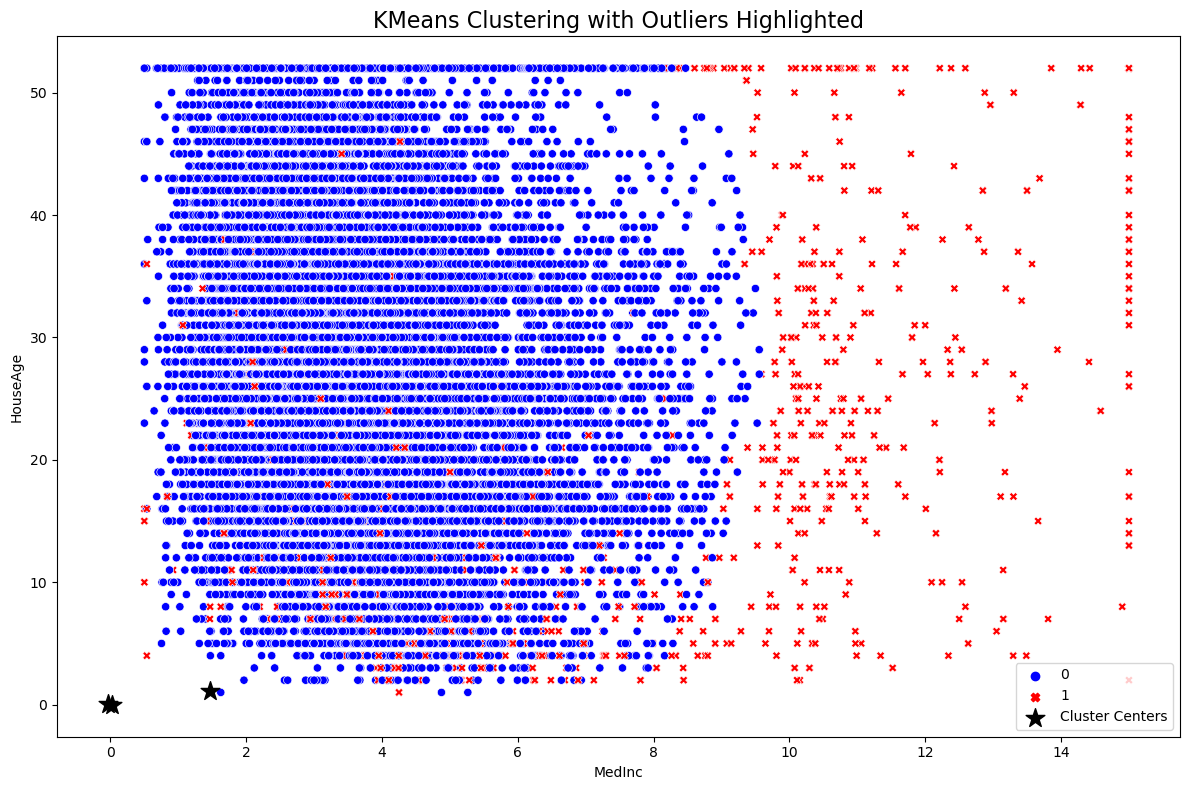

In [13]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Outlier'], palette={True: 'red', False: 'blue'}, style=df['Outlier'], markers={True: 'X', False: 'o'})

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=200, label='Cluster Centers')

plt.title('KMeans Clustering with Outliers Highlighted', fontsize=16)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

plt.legend()

plt.tight_layout()
plt.show()


## RESULT

The code successfully shows outlier detection using KMeans clustering on the california housing dataset.